In [1]:
text = "Hello WorlD! Welcome to our NLP - Deep Learning Bootcamp"
lowercased_text = text.lower()

print(lowercased_text)

hello world! welcome to our nlp - deep learning bootcamp


In [2]:
import re
text = "Hello, world ✋✋! Welcome to?* our&/|~^+%'\" NLP - Deep Learning🧠 Bootcamp🤩."
punctuation_pattern = r'[^\w\s]'
text_cleaned = re.sub(punctuation_pattern, '', text)
print(text_cleaned)

Hello world  Welcome to our NLP  Deep Learning Bootcamp


In [3]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Remove stopwords function for any language
def remove_stopwords(text, language):
    stop_words = set(stopwords.words(language))
    word_tokens = text.split()
    filtered_text = [word for word in word_tokens if word not in stop_words]
    print(f"Language: {language}")
    print("Filtered Text:", filtered_text)

# English Example
en_text = "Hello World! This is an NLP - Deep Learning Bootcamp. Hope this is fun!"
remove_stopwords(en_text, "english")

# Hindi + English - Example
hi_text = "Yeh ek bahut accha din hai and I am feeling awesome"
remove_stopwords(hi_text, "hinglish")

Language: english
Filtered Text: ['Hello', 'World!', 'This', 'NLP', '-', 'Deep', 'Learning', 'Bootcamp.', 'Hope', 'fun!']
Language: hinglish
Filtered Text: ['Yeh', 'din', 'I', 'feeling', 'awesome']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

text = "I hope this bootcamp is useful for you. You can share it with your friends at https://example.com"
remove_urls(text)

'I hope this bootcamp is useful for you. You can share it with your friends at '

In [5]:
import re

text = """<html><div>
<h1>NLP - Deep Learning</h1>
<p>Removal of HTML tags</p>
<a href="https://example.com"></a>
</div></html>"""

html_tags_pattern = r'<.*?>'
text_without_html_tags = re.sub(html_tags_pattern, '', text)
print(text_without_html_tags)


NLP - Deep Learning
Removal of HTML tags




In [6]:
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def stem_words(text):
    word_tokens = text.split()
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

text = 'text preprocessing section in course nlp - deep learning'
stem_words(text)

['text', 'preprocess', 'section', 'in', 'cours', 'nlp', '-', 'deep', 'learn']

In [16]:
from nltk.stem import WordNetLemmatizer
import nltk

# Download the wordnet corpus
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    word_tokens = text.split()
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

text = 'text preprocessing section in course nlp - deep learning'
print(lemmatize_word(text))

['text', 'preprocessing', 'section', 'in', 'course', 'nlp', '-', 'deep', 'learn']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
import nltk
from nltk.tokenize import word_tokenize


# Download both tokenizers
nltk.download('punkt')
nltk.download('punkt_tab')


text = "Congratulations you are almost at the end of this file."

tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['Congratulations', 'you', 'are', 'almost', 'at', 'the', 'end', 'of', 'this', 'file', '.']


In [22]:
import nltk
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords

# Defining all pre-processing steps
def preprocessing_text(text):
    lemmatizer = WordNetLemmatizer()
    emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'

    text = text.split()
    text = [lemmatizer.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(emoji_pattern, '', text)
    text= re.sub(r'\s+', ' ', text)
    text= text.lower().strip()

    return text

paragraph = """Welcome to the NLP - Deep Learning Bootcamp.
            Hope that you have watched all the resources uploaded on our official notion page.
            If you have not please begin there, thanks!
            """

sentences_list = nltk.sent_tokenize(paragraph)

corpus = [preprocessing_text(sentence) for sentence in sentences_list]

print(corpus)

['welcome nlp deep learning bootcamp', 'hope watched resource uploaded official notion page', 'if please begin there thanks']


In [23]:
# Creating a Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names_out()
X_array = X.toarray()

print("Unique Word List: \n", feature_names)
print("Bag of Words Matrix: \n", X_array)

Unique Word List: 
 ['begin' 'bootcamp' 'deep' 'hope' 'if' 'learning' 'nlp' 'notion'
 'official' 'page' 'please' 'resource' 'thanks' 'there' 'uploaded'
 'watched' 'welcome']
Bag of Words Matrix: 
 [[0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0]
 [1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0]]


In [24]:
# Visualizing results in tabular form
import pandas as pd

df = pd.DataFrame(data=X_array, columns=feature_names, index=corpus)
(df)

,begin,bootcamp,deep,hope,if,learning,nlp,notion,official,page,please,resource,thanks,there,uploaded,watched,welcome
welcome nlp deep learning bootcamp,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1
hope watched resource uploaded official notion page,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,1,0
if please begin there thanks,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [25]:
from nltk.stem import WordNetLemmatizer
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# Define all pre-processing steps except for Lemmatization
def preprocessing_text(text):
    emoji_pattern = r'^(?:[\u2700-\u27bf]|(?:\ud83c[\udde6-\uddff]){1,2}|(?:\ud83d[\udc00-\ude4f]){1,2}|[\ud800-\udbff][\udc00-\udfff]|[\u0021-\u002f\u003a-\u0040\u005b-\u0060\u007b-\u007e]|\u3299|\u3297|\u303d|\u3030|\u24c2|\ud83c[\udd70-\udd71]|\ud83c[\udd7e-\udd7f]|\ud83c\udd8e|\ud83c[\udd91-\udd9a]|\ud83c[\udde6-\uddff]|\ud83c[\ude01-\ude02]|\ud83c\ude1a|\ud83c\ude2f|\ud83c[\ude32-\ude3a]|\ud83c[\ude50-\ude51]|\u203c|\u2049|\u25aa|\u25ab|\u25b6|\u25c0|\u25fb|\u25fc|\u25fd|\u25fe|\u2600|\u2601|\u260e|\u2611|[^\u0000-\u007F])+$'

    text= text.lower()
    text = text.split()
    text = ' '.join(text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(emoji_pattern, '', text)
    text= re.sub(r'\s+', ' ', text)

    return text

comments = """Welcome to the NLP - Deep Learning Bootcamp.
            Hope that you have watched all the resources uploaded on our official notion page.
            If you have not please begin there, thanks!
            """

sentences_list = nltk.sent_tokenize(comments)
corpus = [preprocessing_text(sentence) for sentence in sentences_list]
corpus

['welcome to the nlp deep learning bootcamp',
 'hope that you have watched all the resources uploaded on our official notion page',
 'if you have not please begin there thanks']

In [26]:
# Calculating Product of Term Frequency & Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
terms = tfidf_vectorizer.get_feature_names_out()
df = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

df

,all,begin,bootcamp,deep,have,hope,if,learning,nlp,not,...,resources,thanks,that,the,there,to,uploaded,watched,welcome,you
0,0.000000,0.000000,0.389888,0.389888,0.000000,0.000000,0.000000,0.389888,0.389888,0.000000,...,0.000000,0.000000,0.000000,0.296520,0.000000,0.389888,0.000000,0.000000,0.389888,0.000000
1,0.280219,0.000000,0.000000,0.000000,0.213114,0.280219,0.000000,0.000000,0.000000,0.000000,...,0.280219,0.000000,0.280219,0.213114,0.000000,0.000000,0.280219,0.280219,0.000000,0.213114
2,0.000000,0.373801,0.000000,0.000000,0.284285,0.000000,0.373801,0.000000,0.000000,0.373801,...,0.000000,0.373801,0.000000,0.000000,0.373801,0.000000,0.000000,0.000000,0.000000,0.284285


In [27]:
# Creating a Word Cloud
texts = [
    "Python is a popular programming language.",
    "NLP is a field of artificial intelligence that focuses on the interaction between computers and human language.",
    "Sentiment analysis is the process of classifying the emotional intent of text.",
    "Machine learning is an important application of AI.",
    "Natural Language Processing is used for text analysis.",
    "Python libraries like scikit-learn and NLTK are used in NLP.",
    "AI and machine learning are transforming industries.",
    "If you are interested in NLP, stay tuned!"
]

In [28]:
import re

def clean_text(text):
    clean_txt = text.lower()
    # Clear characters other than numbers and letters of the alphabet only
    clean_txt = re.sub(r'[^0-9a-zçğıiöşü\s]', '', clean_txt,
                       flags=re.IGNORECASE)

    return ' '.join(sorted(clean_txt.split()))

cleaned_texts = [clean_text(text) for text in texts]

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(cleaned_texts)

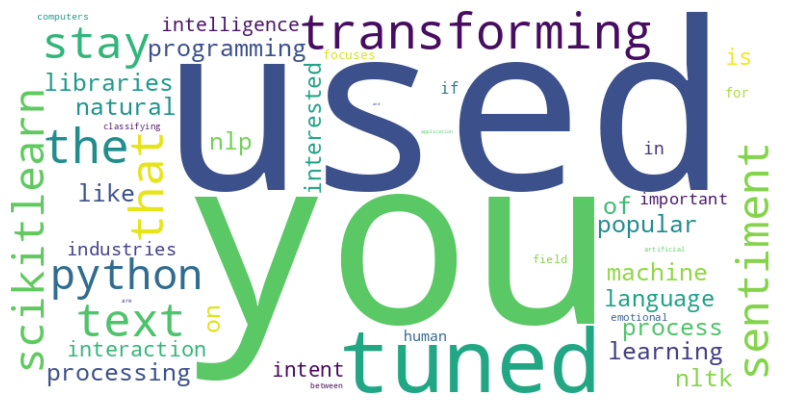

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vectorizer.vocabulary_)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
import nltk
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Download NLTK data
nltk.download('punkt')

# Sample corpus
corpus = [
    "Python is a popular programming language.",
    "NLP is a field of artificial intelligence that focuses on the interaction between computers and human language.",
    "Sentiment analysis is the process of classifying the emotional intent of text.",
    "Machine learning is an important application of AI.",
    "Natural Language Processing is used for text analysis.",
    "Python libraries like scikit-learn and NLTK are used in NLP.",
    "AI and machine learning are transforming industries.",
    "If you are interested in NLP, stay tuned!"
]

# Tokenize the corpus using NLTK
tokenized_corpus = [nltk.word_tokenize(sentence.lower()) for sentence in corpus]

# Flatten the list to get all words in the corpus
all_words = [word for sentence in tokenized_corpus for word in sentence]

# Get unique words (vocabulary)
vocab = sorted(set(all_words))

# Print vocabulary
print("Vocabulary:", vocab)

# Reshape the list of words into a 2D array for OneHotEncoder
word_array = np.array(all_words).reshape(-1, 1)

# Apply OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = one_hot_encoder.fit_transform(word_array)

# Print the one-hot encoded data
print("One-hot encoded matrix:\n", one_hot_encoded)

Vocabulary: ['!', ',', '.', 'a', 'ai', 'an', 'analysis', 'and', 'application', 'are', 'artificial', 'between', 'classifying', 'computers', 'emotional', 'field', 'focuses', 'for', 'human', 'if', 'important', 'in', 'industries', 'intelligence', 'intent', 'interaction', 'interested', 'is', 'language', 'learning', 'libraries', 'like', 'machine', 'natural', 'nlp', 'nltk', 'of', 'on', 'popular', 'process', 'processing', 'programming', 'python', 'scikit-learn', 'sentiment', 'stay', 'text', 'that', 'the', 'transforming', 'tuned', 'used', 'you']
One-hot encoded matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 68.1 MB/s eta 0:00:00


In [34]:
import gensim
from gensim.models import Word2Vec

sentences = [
    ['this', 'is', 'an', 'example', 'sentence', 'for', 'word2vec'],
    ['we', 'are', 'creating', 'a', 'word2vec', 'model', 'using', 'the', 'gensim', 'library'],
    ['we', 'are', 'working', 'with', 'cbow', 'and', 'skipgram', 'models'],
    ['python', 'is', 'a', 'programming', 'language', 'for', 'natural', 'language', 'processing'],
    ['word2vec', 'is', 'one', 'of', 'the', 'word', 'embedding', 'techniques'],
    ['the', 'word2vec', 'model', 'is', 'used', 'for', 'word', 'embeddings'],
    ['gensim', 'provides', 'an', 'easy', 'way', 'to', 'train', 'word2vec', 'models'],
    ['cbow', 'and', 'skipgram', 'are', 'two', 'types', 'of', 'word2vec', 'models'],
    ['word2vec', 'is', 'a', 'technique', 'for', 'natural', 'language', 'processing'],
    ['this', 'sentence', 'is', 'about', 'word2vec', 'and', 'its', 'applications'],
    ['word2vec', 'is', 'a', 'popular', 'word', 'embedding', 'method'],
    ['many', 'researchers', 'use', 'word2vec', 'for', 'various', 'nlp', 'tasks'],
    ['the', 'skipgram', 'model', 'focuses', 'on', 'predicting', 'context', 'words'],
    ['cbow', 'model', 'predicts', 'the', 'center', 'word', 'from', 'context', 'words'],
    ['natural', 'language', 'processing', 'involves', 'working', 'with', 'large', 'datasets']
]

cbow_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0, alpha=0.03, min_alpha=0.0007, epochs=100)
skipgram_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1, alpha=0.03, min_alpha=0.0007, epochs=100)

cbow_model.train(sentences, total_examples=len(sentences), epochs=100)
skipgram_model.train(sentences, total_examples=len(sentences), epochs=100)

word_vectors_cbow = cbow_model.wv
similarity_cbow = word_vectors_cbow.similarity('word2vec', 'gensim')
print(f"Similarity between 'word2vec' and 'gensim': {similarity_cbow} with CBOW")


word_vectors_skipgram= skipgram_model.wv
similarity_skip = word_vectors_skipgram.similarity('word2vec', 'gensim')
print(f"Similarity between 'word2vec' and 'gensim': {similarity_skip} with Skip-Gram")

Similarity between 'word2vec' and 'gensim': 0.9972667098045349 with CBOW
Similarity between 'word2vec' and 'gensim': 0.9977070093154907 with Skip-Gram
